# Part 2: Rent Prediction

In this project, we are required to build a model to predict rents in Switzerland. This is a **regression** task and can be divided into following steps:
- **Data Preparation**
    - Statitics Summary
    - Data Visualization
    - One-Hot Encoding
    - Imputation
    - Quantile Transformation    
- **Model Selection**
    - Linear Models
    - Support Vector Machines
    - Nearest Neighbors
    - Decision Trees
    - Neural Network Models
- **Model Evaluation**
    - Hyperparameter Tuning
    - Cross Validation
- **Model Prediction**

Note: [scikit-learn](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

# Data Preparation

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

In [2]:
# read dataset
raw_train_data = pd.read_csv('training.csv')

# copy the original data
train_data = raw_train_data.copy()

print('Data shape: {}'.format(train_data.shape))

Data shape: (72000, 83)


## Statistics Summary

In [3]:
# summary statitics
train_data.describe()

,id,GDENR,area,balcony,basement,bath,cabletv,cheminee,dishwasher,dryer,...,dist_to_5G,dist_to_haltst,dist_to_highway,dist_to_lake,dist_to_main_stat,dist_to_school_1,dist_to_train_stat,restaur_pix_count_km2,superm_pix_count_km2,dist_to_river
count,72000.000000,72000.000000,57767.000000,34520.0,976.0,496.0,24906.0,3330.0,1178.0,572.0,...,72000.000000,71492.000000,72000.000000,38262.000000,50571.000000,71498.000000,72000.000000,72000.000000,72000.000000,72000.000000
mean,36000.500000,2879.512722,82.959233,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,7638.035391,166.852546,2922.607580,1864.570974,1236.536863,396.477677,1057.297004,11.650417,1.721319,823.578550
std,20784.754028,2199.443778,34.487208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12363.592303,174.026725,3228.381560,5873.068385,1155.591313,355.310688,1158.211097,22.482845,2.219454,968.968316
min,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.236068,2.828427,11.401754,4.638762,3.605551,1.414214,3.162278,0.000000,0.000000,0.041264
25%,18000.750000,404.000000,60.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1323.998583,78.873316,1145.318296,576.187827,474.067506,204.732142,374.001003,1.000000,0.000000,224.010704
50%,36000.500000,2766.000000,80.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3529.439957,130.387883,1984.648834,1204.365110,885.849874,327.678196,684.942698,3.000000,1.000000,515.221416
75%,54000.250000,4776.000000,101.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,9033.896515,202.141040,3410.488088,2176.086622,1613.165521,473.608488,1243.497085,9.000000,3.000000,1065.183279
max,72000.000000,6810.000000,945.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,88563.904680,4967.810886,41454.525950,205028.994100,15405.006360,7534.579285,23787.109950,136.000000,12.000000,8233.113960


In [4]:
# data info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72000 entries, 0 to 71999
Data columns (total 83 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              72000 non-null  int64  
 1   GDENAMK                         72000 non-null  object 
 2   GDENR                           72000 non-null  int64  
 3   KTKZ                            72000 non-null  object 
 4   address                         72000 non-null  object 
 5   area                            57767 non-null  float64
 6   balcony                         34520 non-null  float64
 7   basement                        976 non-null    float64
 8   bath                            496 non-null    float64
 9   cabletv                         24906 non-null  float64
 10  cheminee                        3330 non-null   float64
 11  date                            72000 non-null  object 
 12  descr                           

In [5]:
# calculate the percentage of missing values for each column
missing_pct = train_data.isnull().mean()
missing_pct.sort_values(ascending=False)

manlift                          0.999986
oven                             0.999875
heating_pellets                  0.999847
shower                           0.999847
middle_house                     0.999833
                                   ...   
year                             0.000000
Micro_rating                     0.000000
Micro_rating_NoiseAndEmission    0.000000
Micro_rating_Accessibility       0.000000
dist_to_river                    0.000000
Length: 83, dtype: float64

In [6]:
# print columns with missing values and their missing value percentage
missing_info = missing_pct[missing_pct != 0]
missing_info.sort_values(ascending=False)

manlift                          0.999986
oven                             0.999875
shower                           0.999847
heating_pellets                  0.999847
heating_electro                  0.999833
middle_house                     0.999833
gardenshed                       0.999819
heating_earth                    0.999750
pool                             0.999639
heating_air                      0.999500
heating_far                      0.999431
quiet                            0.999375
heating_gas                      0.999319
sunny                            0.999250
heating_oil                      0.999014
veranda                          0.998972
water                            0.998736
terrace                          0.998583
topstorage                       0.998278
furnished                        0.997292
playground                       0.996931
bath                             0.993111
dryer                            0.992056
laundry                          0

In [7]:
# drop the columns with missing value percentage more than 20%
train_data.drop(missing_info[missing_info > 0.2].index, axis=1, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72000 entries, 0 to 71999
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              72000 non-null  int64  
 1   GDENAMK                         72000 non-null  object 
 2   GDENR                           72000 non-null  int64  
 3   KTKZ                            72000 non-null  object 
 4   address                         72000 non-null  object 
 5   area                            57767 non-null  float64
 6   date                            72000 non-null  object 
 7   home_type                       72000 non-null  object 
 8   lat                             72000 non-null  float64
 9   lon                             72000 non-null  float64
 10  month                           72000 non-null  int64  
 11  msregion                        72000 non-null  int64  
 12  newly_built                     

**Note:** 
- Among those columns with more than 20% missing values, only "*descr*" (28%), "*floors*"(39%), "*dist_to_lake*"(46%), "*dist_to_main_stat*"(29%) have missing value percentages less than 50%, all the remaining columns have a higher proportion of missing values (more than 90%).
- "*descr*" is a text feature and it requires text analysis or sentiment analysis which I am not familiar with. In addition, this column contains 28% missing values. It is quite complicated to impute text missing values.
- Imputation for higher proportion of missing values may bias the original data. It is better to drop them rather than imputing them.

In [8]:
# sort the data by its data type
numeric_columns = []
categoric_columns = []
numeric_columns.extend(list(train_data.dtypes[train_data.dtypes == np.int64].index))
numeric_columns.extend(list(train_data.dtypes[train_data.dtypes == np.float64].index))
categoric_columns.extend(list(train_data.dtypes[train_data.dtypes == np.object].index))

# numerical data
numeric_data = pd.DataFrame(train_data, columns=numeric_columns)
# categorical data
categoric_data = pd.DataFrame(train_data, columns=categoric_columns)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'GDENR'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'msregion'}>,
        <AxesSubplot:title={'center':'newly_built'}>,
        <AxesSubplot:title={'center':'quarter_general'}>],
       [<AxesSubplot:title={'center':'rent_full'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Micro_rating_SunAndView'}>,
        <AxesSubplot:title={'center':'Noise_max'}>,
        <AxesSubplot:title={'center':'apoth_pix_count_km2'}>,
        <AxesSubplot:title={'center':'restaur_pix_count_km2'}>],
       [<AxesSubplot:title={'center':'superm_pix_count_km2'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lon'}>,
        <AxesSubplot:title={'center':'quarter_specific'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'Mic

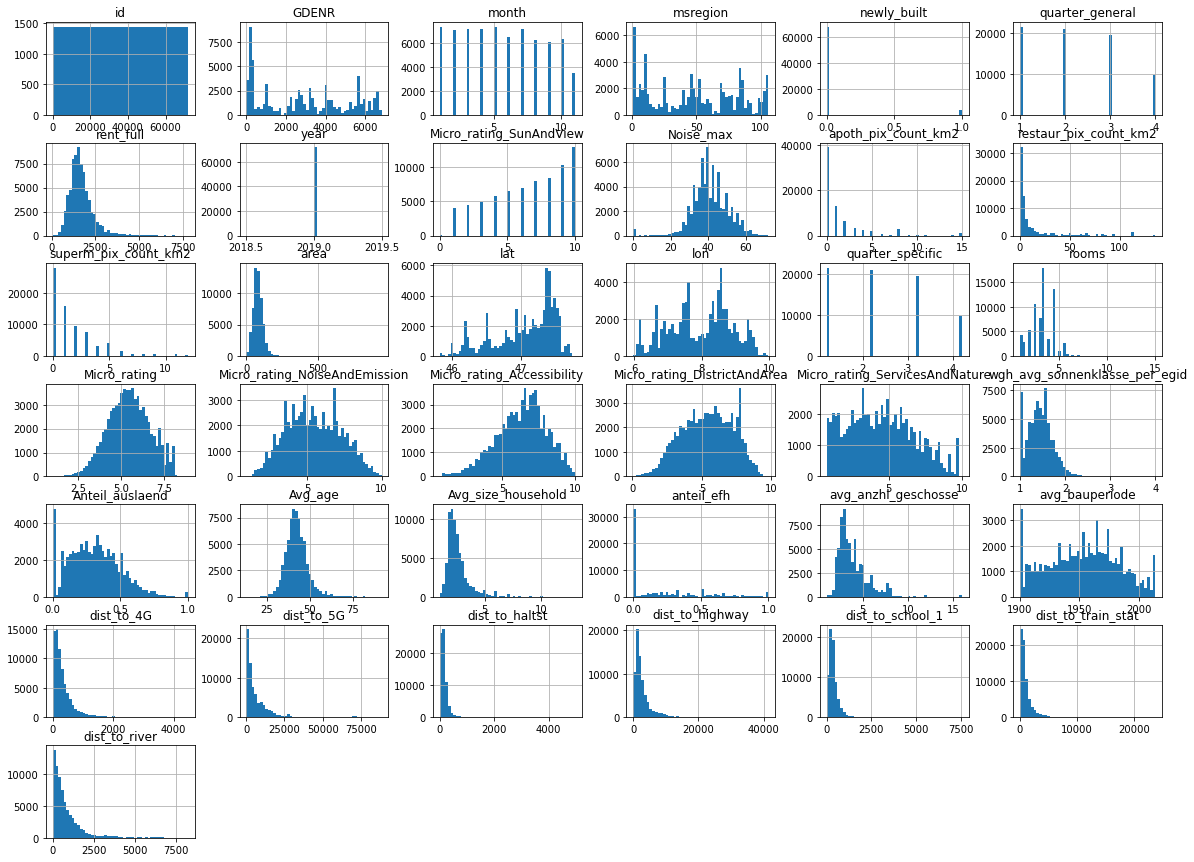

In [9]:
# use histgram to visualize the distribution of each numeric feature
numeric_data.hist(bins=50, figsize=(20, 15))

In [10]:
print(np.unique(numeric_data['month']))
print(np.unique(numeric_data['newly_built']))
print(np.unique(numeric_data['quarter_general']))
print(np.unique(numeric_data['Micro_rating_SunAndView']))
print(np.unique(numeric_data['apoth_pix_count_km2']))
print(np.unique(numeric_data['superm_pix_count_km2']))
print(np.unique(numeric_data['quarter_specific']))

[ 1  2  3  4  5  6  7  8  9 10 11]
[0 1]
[1 2 3 4]
[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10 11 14 15]
[ 0  1  2  3  4  5  6  7  8  9 11 12]
[1.2019 2.2019 3.2019 4.2019]


In [11]:
from sklearn.feature_selection import VarianceThreshold

# remove features that have zero variance
selector = VarianceThreshold(threshold=0)
selector.fit_transform(numeric_data)
numeric_data = numeric_data[numeric_data.columns[selector.get_support(indices=True)]] # drop the column 'year'

# drop numerical columns that have little impact on the prediction
numeric_data = numeric_data.drop(['id', 'GDENR'], axis=1)

# drop 'quarter_specific' since it is colinearly related to 'quarter_general'
numeric_data = numeric_data.drop(['quarter_specific'], axis=1)

In [12]:
print(categoric_data.columns)

# keep categorical columns that have impact on prediction
categoric_data = categoric_data[['home_type']]

Index(['GDENAMK', 'KTKZ', 'address', 'date', 'home_type'], dtype='object')


In [13]:
print(numeric_data.info())
print('===========================================')
print(categoric_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72000 entries, 0 to 71999
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   month                           72000 non-null  int64  
 1   msregion                        72000 non-null  int64  
 2   newly_built                     72000 non-null  int64  
 3   quarter_general                 72000 non-null  int64  
 4   rent_full                       72000 non-null  int64  
 5   Micro_rating_SunAndView         72000 non-null  int64  
 6   Noise_max                       72000 non-null  int64  
 7   apoth_pix_count_km2             72000 non-null  int64  
 8   restaur_pix_count_km2           72000 non-null  int64  
 9   superm_pix_count_km2            72000 non-null  int64  
 10  area                            57767 non-null  float64
 11  lat                             72000 non-null  float64
 12  lon                             

### Data Visualization

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

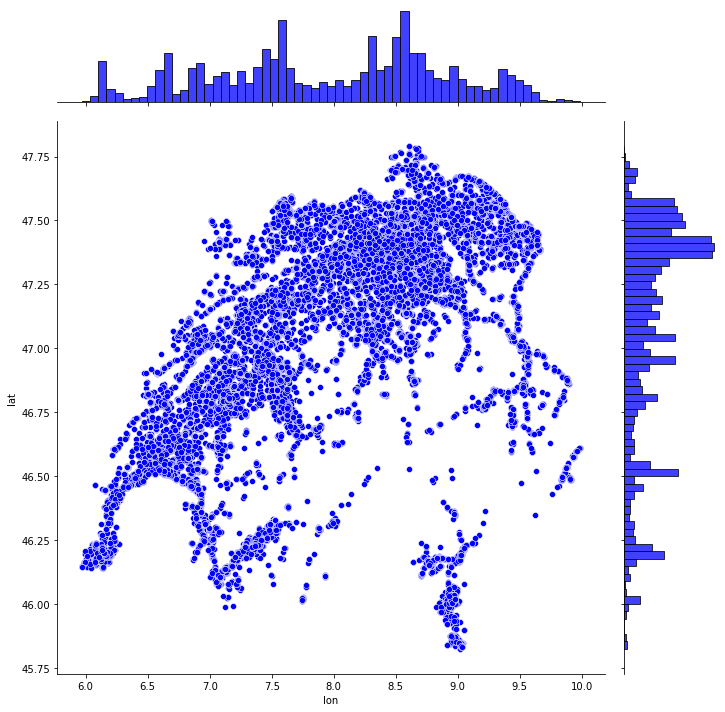

In [15]:
# visualize the location based on latitude and longtitude
sns.jointplot(x='lon', y='lat', data=numeric_data, kind='scatter', height=10, color='b')
sns.despine

<img src='Switzerland-map.png'>

We used latitude and longitude variables to visualize the location of these rentals and found that rental market is highly active in Zurich, Berne, Lausanne, and Geneva. The reason would be that there are more foreign people in those areas for work or study and they have great demand for renting houses/flats. Then we added *Anteil_auslaend* and *rent_full* to the plot and found it is the case. It is worth to mention that the rents in Zurich, Berne, Lausanne, and Geneva are more expensive than other parts of the Switzerland.

<AxesSubplot:xlabel='Longtitude', ylabel='Latitude'>

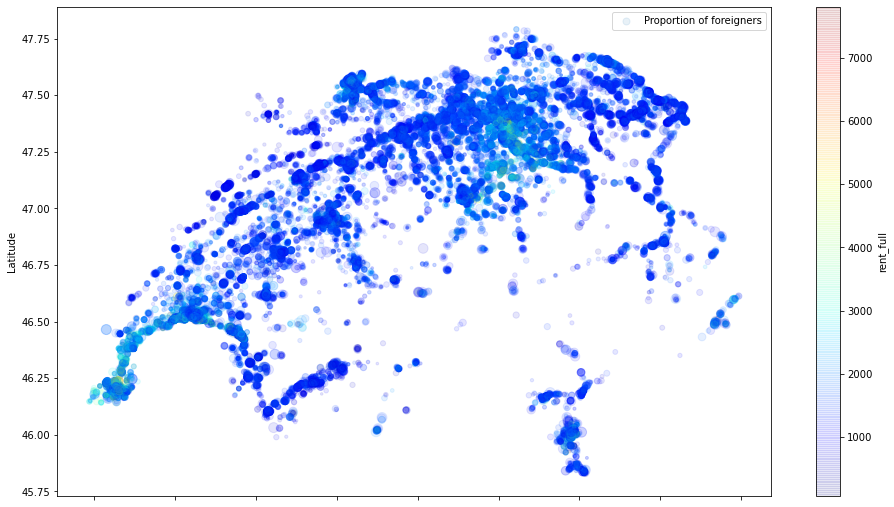

In [16]:
# visualize the location of houses based on latitude and longtitude with rents
train_data.plot(kind='scatter', x='lon', y='lat', alpha=0.1, s=train_data['Anteil_auslaend']*100, 
                label='Proportion of foreigners', c='rent_full', cmap=plt.get_cmap('jet'), colorbar=True, 
                xlabel='Longtitude', ylabel='Latitude', figsize=(16, 9))

We used histograms to visualize the distribution of each numerical feature and concluded that it is not appropriate to simply replace the missing values with their mean values or median values.

array([[<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'msregion'}>,
        <AxesSubplot:title={'center':'newly_built'}>,
        <AxesSubplot:title={'center':'quarter_general'}>,
        <AxesSubplot:title={'center':'rent_full'}>,
        <AxesSubplot:title={'center':'Micro_rating_SunAndView'}>],
       [<AxesSubplot:title={'center':'Noise_max'}>,
        <AxesSubplot:title={'center':'apoth_pix_count_km2'}>,
        <AxesSubplot:title={'center':'restaur_pix_count_km2'}>,
        <AxesSubplot:title={'center':'superm_pix_count_km2'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'lon'}>,
        <AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'Micro_rating'}>,
        <AxesSubplot:title={'center':'Micro_rating_NoiseAndEmission'}>,
        <AxesSubplot:title={'center':'Micro_rating_Accessibility'}>,
        <AxesSubplot:title={'center':'Micro_r

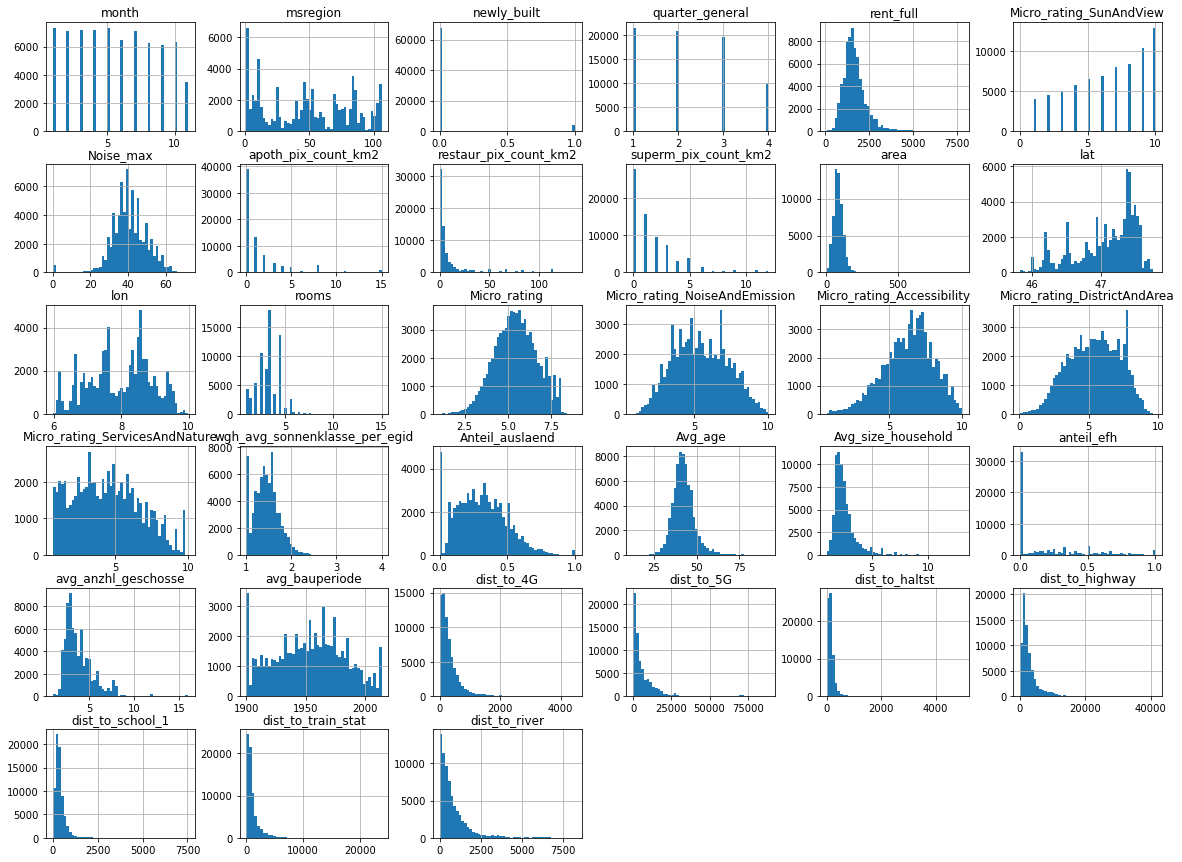

In [17]:
# use histgram to visualize the distribution of each numeric feature
numeric_data.hist(bins=50, figsize=(20, 15))

In [18]:
# correlation coefficient matrix
corr_matrix = numeric_data.corr()
corr_matrix['rent_full'].abs().sort_values(ascending=False)

rent_full                         1.000000
area                              0.664414
rooms                             0.595098
newly_built                       0.111572
dist_to_5G                        0.102364
msregion                          0.086116
avg_anzhl_geschosse               0.081680
Micro_rating_DistrictAndArea      0.080628
restaur_pix_count_km2             0.075598
avg_bauperiode                    0.068834
dist_to_4G                        0.064862
dist_to_highway                   0.057883
dist_to_river                     0.057121
apoth_pix_count_km2               0.056125
Micro_rating                      0.047787
Micro_rating_Accessibility        0.043428
Micro_rating_SunAndView           0.042058
Micro_rating_NoiseAndEmission     0.041419
lon                               0.037363
Micro_rating_ServicesAndNature    0.037166
wgh_avg_sonnenklasse_per_egid     0.036560
superm_pix_count_km2              0.035455
lat                               0.031536
dist_to_sch

array([[<AxesSubplot:xlabel='rent_full', ylabel='rent_full'>,
        <AxesSubplot:xlabel='area', ylabel='rent_full'>,
        <AxesSubplot:xlabel='rooms', ylabel='rent_full'>,
        <AxesSubplot:xlabel='newly_built', ylabel='rent_full'>,
        <AxesSubplot:xlabel='dist_to_5G', ylabel='rent_full'>],
       [<AxesSubplot:xlabel='rent_full', ylabel='area'>,
        <AxesSubplot:xlabel='area', ylabel='area'>,
        <AxesSubplot:xlabel='rooms', ylabel='area'>,
        <AxesSubplot:xlabel='newly_built', ylabel='area'>,
        <AxesSubplot:xlabel='dist_to_5G', ylabel='area'>],
       [<AxesSubplot:xlabel='rent_full', ylabel='rooms'>,
        <AxesSubplot:xlabel='area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='newly_built', ylabel='rooms'>,
        <AxesSubplot:xlabel='dist_to_5G', ylabel='rooms'>],
       [<AxesSubplot:xlabel='rent_full', ylabel='newly_built'>,
        <AxesSubplot:xlabel='area', ylabel='newly_built'>,
       

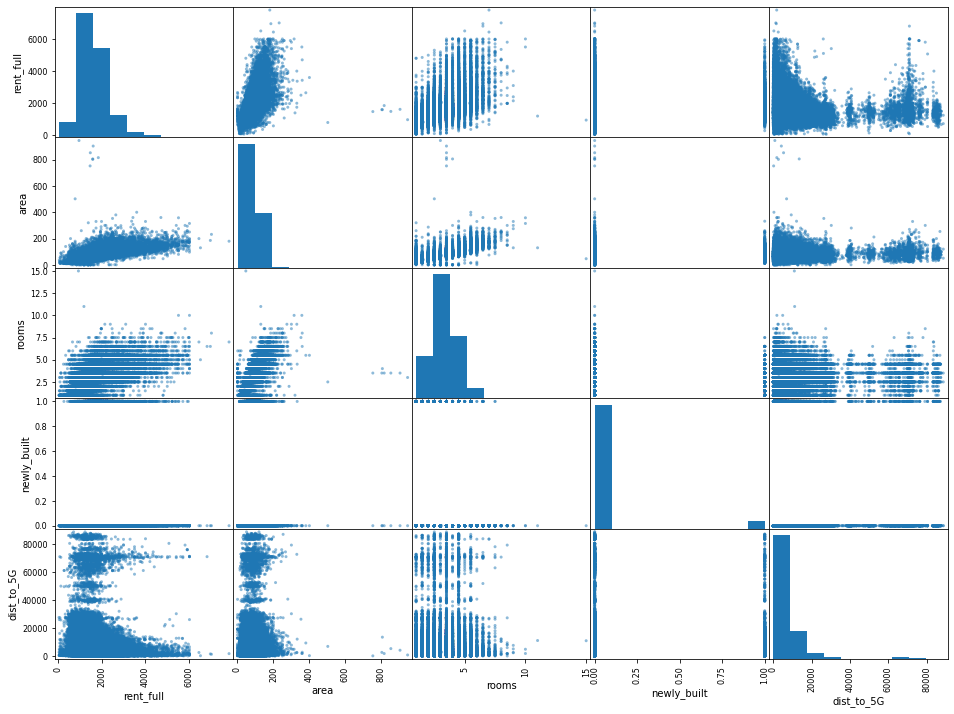

In [19]:
# plot scatter matrix
attrs = corr_matrix['rent_full'].abs().sort_values(ascending=False)[:5].index
scatter_matrix(numeric_data[attrs], figsize=(16,12))

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

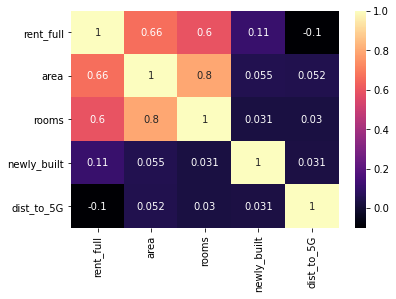

In [20]:
# correlation heatmap
sns.heatmap(numeric_data[attrs].corr(), annot=True, cmap='magma')
sns.despine

In [21]:
# get missing values indices
missing_idx = numeric_data.isnull().mean()[numeric_data.isnull().mean() != 0].index

# print missing values info
numeric_data[missing_idx].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72000 entries, 0 to 71999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   area                           57767 non-null  float64
 1   rooms                          70155 non-null  float64
 2   wgh_avg_sonnenklasse_per_egid  71985 non-null  float64
 3   Anteil_auslaend                69854 non-null  float64
 4   Avg_age                        69854 non-null  float64
 5   Avg_size_household             69767 non-null  float64
 6   anteil_efh                     70439 non-null  float64
 7   avg_anzhl_geschosse            70437 non-null  float64
 8   avg_bauperiode                 70437 non-null  float64
 9   dist_to_haltst                 71492 non-null  float64
 10  dist_to_school_1               71498 non-null  float64
dtypes: float64(11)
memory usage: 6.0 MB


In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler, QuantileTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge

### One-Hot Encoding

There is only one categorical feature, "*home_type*", and this feature is not ordinal. Therefore, I used one-hot encoding for this feature.

In [23]:
# one hot encode the categorical features
encoder = OneHotEncoder()
cat_data_encoded = encoder.fit_transform(categoric_data.to_numpy().reshape(-1, 1))
cat_data_encoded = cat_data_encoded.toarray()
cat_data_encoded.shape

(72000, 8)

### Imputation

Before starting imputing missing values, we did some research online and found that linear regression and tree-based models yield best results on the California housing dataset. Our task is quite similar to prediction in California housing dataset so it might be a good idea to use linear regression or tree-based models in our case. For the imputation method, we ended up using a regularized linear regression (BayesianRidge), which models each feature with missing values as a function of other features and uses that estimate for imputation. The reason why we did not use tree-based models for imputation is that it is more computational expensive. It is worth to mention that we also included target data and one-hot encode categorical data for imputation, which in some sense can improve the imputation performance.

In [24]:
# use regularized linear regression to predict the numerical missing values
imputer = IterativeImputer(random_state=2021, estimator=BayesianRidge())

# include one-hot encoded categorical variable as regressor
num_data_imputed = imputer.fit_transform(np.column_stack((numeric_data, cat_data_encoded)))
num_data_imputed = pd.DataFrame(num_data_imputed[:,:numeric_data.shape[1]], columns=numeric_data.columns)

In [25]:
numeric_data[missing_idx].describe()

,area,rooms,wgh_avg_sonnenklasse_per_egid,Anteil_auslaend,Avg_age,Avg_size_household,anteil_efh,avg_anzhl_geschosse,avg_bauperiode,dist_to_haltst,dist_to_school_1
count,57767.000000,70155.000000,71985.000000,69854.000000,69854.000000,69767.000000,70439.000000,70437.000000,70437.000000,71492.000000,71498.000000
mean,82.959233,3.297571,1.449731,0.308413,42.467455,2.639547,0.229510,3.902628,1953.186281,166.852546,396.477677
std,34.487208,1.155558,0.276183,0.186587,6.816990,1.157461,0.289204,1.701952,29.686226,174.026725,355.310688
min,1.000000,1.000000,1.000000,0.000000,12.833333,1.000000,0.000000,1.000000,1900.000000,2.828427,1.414214
25%,60.000000,2.500000,1.252278,0.166667,38.428571,1.959184,0.000000,2.750000,1930.600000,78.873316,204.732142
50%,80.000000,3.500000,1.438522,0.300000,41.846547,2.333333,0.090909,3.461538,1954.090909,130.387883,327.678196
75%,101.000000,4.500000,1.609645,0.433962,45.795181,2.911765,0.411765,4.666667,1975.000000,202.141040,473.608488
max,945.000000,15.000000,4.000000,1.000000,92.000000,13.000000,1.000000,16.000000,2014.000000,4967.810886,7534.579285


In [26]:
num_data_imputed[missing_idx].describe()

,area,rooms,wgh_avg_sonnenklasse_per_egid,Anteil_auslaend,Avg_age,Avg_size_household,anteil_efh,avg_anzhl_geschosse,avg_bauperiode,dist_to_haltst,dist_to_school_1
count,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000,72000.000000
mean,81.144666,3.295019,1.449837,0.308405,42.484440,2.641635,0.229702,3.903304,1953.192526,167.856496,397.537734
std,33.403604,1.153259,0.276254,0.184483,6.724627,1.147612,0.286774,1.690259,29.447591,174.222472,354.519157
min,1.000000,0.104861,1.000000,-0.109751,12.833333,-0.010508,-0.056176,0.436997,1900.000000,2.828427,1.414214
25%,60.000000,2.500000,1.252278,0.169811,38.547619,1.960448,0.000000,2.750000,1931.000000,79.309520,205.446464
50%,79.000000,3.500000,1.438723,0.302632,41.928571,2.349693,0.100000,3.500000,1954.200000,131.184984,329.091932
75%,100.000000,4.500000,1.609900,0.430173,45.735330,2.923077,0.400000,4.666667,1975.000000,203.931974,476.164099
max,945.000000,15.000000,4.000000,1.000000,92.000000,13.000000,1.000000,16.000000,2014.000000,4967.810886,7534.579285


### Data Centering and Scaling

In this regression task, the objective function is to minimize the mean squared error, which is based on the distance computation. If we do not center and scale the features, the objective function will be govern by those features with a broad range of values and the training time will also be quite long. We therefore have to center and scale all the numerical features to eliminate the impact from scales and magnitudes and to speed up the training process. In addition, we also have to take outliers into account. Both RobustScaler and QuantileTransformer are robust to outliers in the sense that adding or removing outliers in the training set will yield approximately the same transformation on held out data. Here we will use *QuantileTransformer* since this method can make the data more Gaussian-like.

In [27]:
num_data_imputed.shape

(72000, 33)

array([[<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'msregion'}>,
        <AxesSubplot:title={'center':'newly_built'}>,
        <AxesSubplot:title={'center':'quarter_general'}>,
        <AxesSubplot:title={'center':'rent_full'}>,
        <AxesSubplot:title={'center':'Micro_rating_SunAndView'}>],
       [<AxesSubplot:title={'center':'Noise_max'}>,
        <AxesSubplot:title={'center':'apoth_pix_count_km2'}>,
        <AxesSubplot:title={'center':'restaur_pix_count_km2'}>,
        <AxesSubplot:title={'center':'superm_pix_count_km2'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'lon'}>,
        <AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'Micro_rating'}>,
        <AxesSubplot:title={'center':'Micro_rating_NoiseAndEmission'}>,
        <AxesSubplot:title={'center':'Micro_rating_Accessibility'}>,
        <AxesSubplot:title={'center':'Micro_r

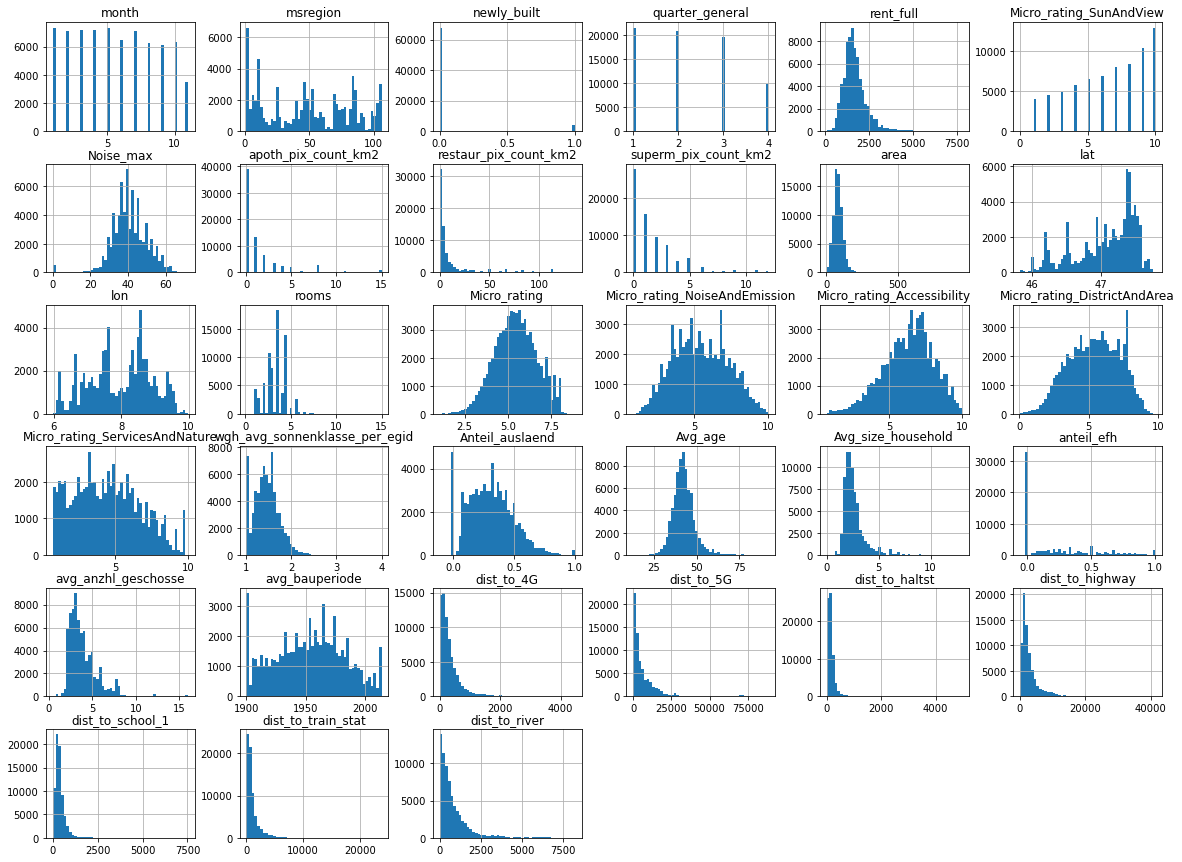

In [28]:
num_data_imputed.hist(bins=50, figsize=(20, 15))

In [29]:
print(np.unique(num_data_imputed['month']))
print(np.unique(num_data_imputed['newly_built']))
print(np.unique(num_data_imputed['quarter_general']))
print(np.unique(num_data_imputed['Micro_rating_SunAndView']))
print(np.unique(num_data_imputed['apoth_pix_count_km2']))
print(np.unique(num_data_imputed['superm_pix_count_km2']))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
[0. 1.]
[1. 2. 3. 4.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 14. 15.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 11. 12.]


In [30]:
binary_data = num_data_imputed[['newly_built']]
num_data_imputed = num_data_imputed.drop(['newly_built'], axis=1)

In [31]:
print(num_data_imputed.shape)
print(binary_data.shape)

(72000, 32)
(72000, 1)


In [32]:
num_data_imputed.drop(['rent_full'], axis=1).columns

Index(['month', 'msregion', 'quarter_general', 'Micro_rating_SunAndView',
       'Noise_max', 'apoth_pix_count_km2', 'restaur_pix_count_km2',
       'superm_pix_count_km2', 'area', 'lat', 'lon', 'rooms', 'Micro_rating',
       'Micro_rating_NoiseAndEmission', 'Micro_rating_Accessibility',
       'Micro_rating_DistrictAndArea', 'Micro_rating_ServicesAndNature',
       'wgh_avg_sonnenklasse_per_egid', 'Anteil_auslaend', 'Avg_age',
       'Avg_size_household', 'anteil_efh', 'avg_anzhl_geschosse',
       'avg_bauperiode', 'dist_to_4G', 'dist_to_5G', 'dist_to_haltst',
       'dist_to_highway', 'dist_to_school_1', 'dist_to_train_stat',
       'dist_to_river'],
      dtype='object')

In [33]:
# use quantile transformer on numerical data
transformer = QuantileTransformer(output_distribution='normal')
num_data_transformed = transformer.fit_transform(num_data_imputed.drop(['rent_full'], axis=1))
num_data_transformed.shape

(72000, 31)

array([[<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'msregion'}>,
        <AxesSubplot:title={'center':'quarter_general'}>,
        <AxesSubplot:title={'center':'Micro_rating_SunAndView'}>,
        <AxesSubplot:title={'center':'Noise_max'}>,
        <AxesSubplot:title={'center':'apoth_pix_count_km2'}>],
       [<AxesSubplot:title={'center':'restaur_pix_count_km2'}>,
        <AxesSubplot:title={'center':'superm_pix_count_km2'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lon'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'Micro_rating'}>,
        <AxesSubplot:title={'center':'Micro_rating_NoiseAndEmission'}>,
        <AxesSubplot:title={'center':'Micro_rating_Accessibility'}>,
        <AxesSubplot:title={'center':'Micro_rating_DistrictAndArea'}>,
        <AxesSubplot:title={'center':'Micro_rating_ServicesAndNature'}>,
       

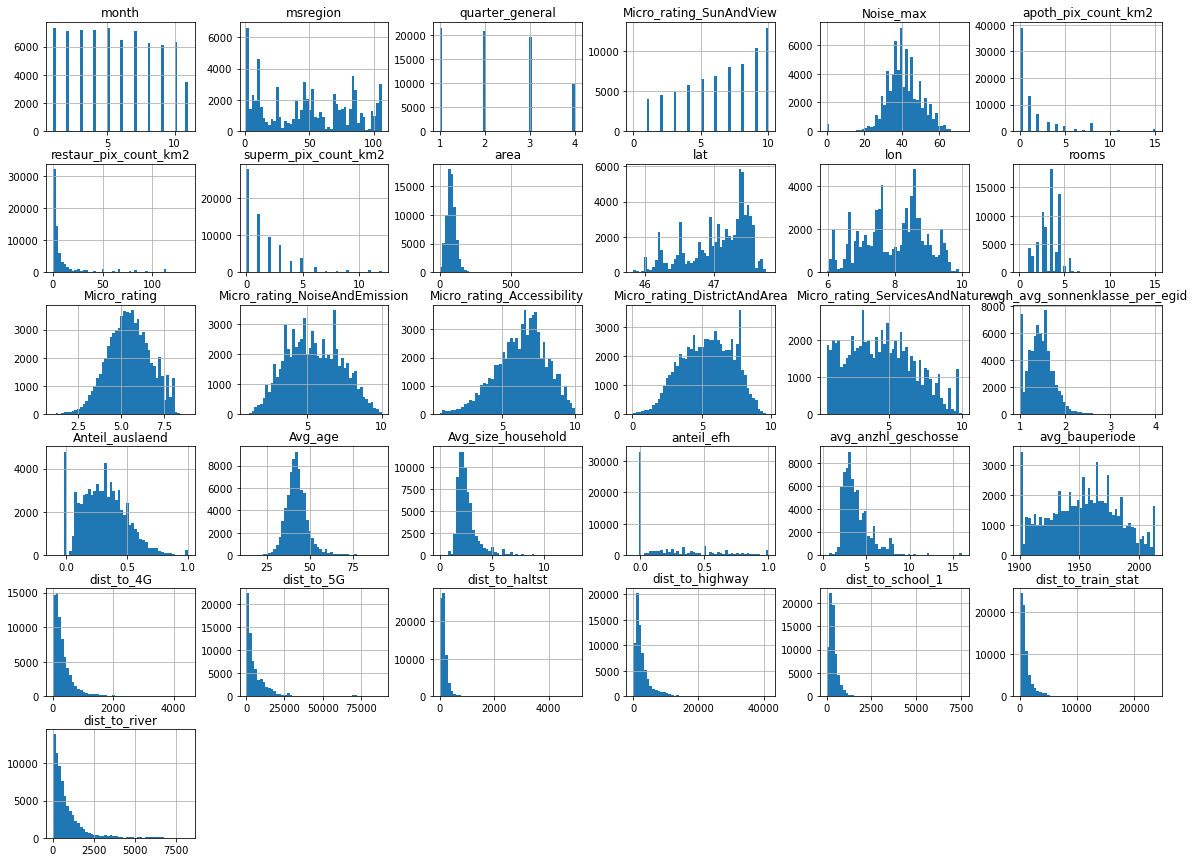

In [34]:
# before data transformation
pd.DataFrame(num_data_imputed, columns=num_data_imputed.drop(['rent_full'], axis=1).columns).hist(bins=50, figsize=(20, 15))

array([[<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'msregion'}>,
        <AxesSubplot:title={'center':'quarter_general'}>,
        <AxesSubplot:title={'center':'Micro_rating_SunAndView'}>,
        <AxesSubplot:title={'center':'Noise_max'}>,
        <AxesSubplot:title={'center':'apoth_pix_count_km2'}>],
       [<AxesSubplot:title={'center':'restaur_pix_count_km2'}>,
        <AxesSubplot:title={'center':'superm_pix_count_km2'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lon'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'Micro_rating'}>,
        <AxesSubplot:title={'center':'Micro_rating_NoiseAndEmission'}>,
        <AxesSubplot:title={'center':'Micro_rating_Accessibility'}>,
        <AxesSubplot:title={'center':'Micro_rating_DistrictAndArea'}>,
        <AxesSubplot:title={'center':'Micro_rating_ServicesAndNature'}>,
       

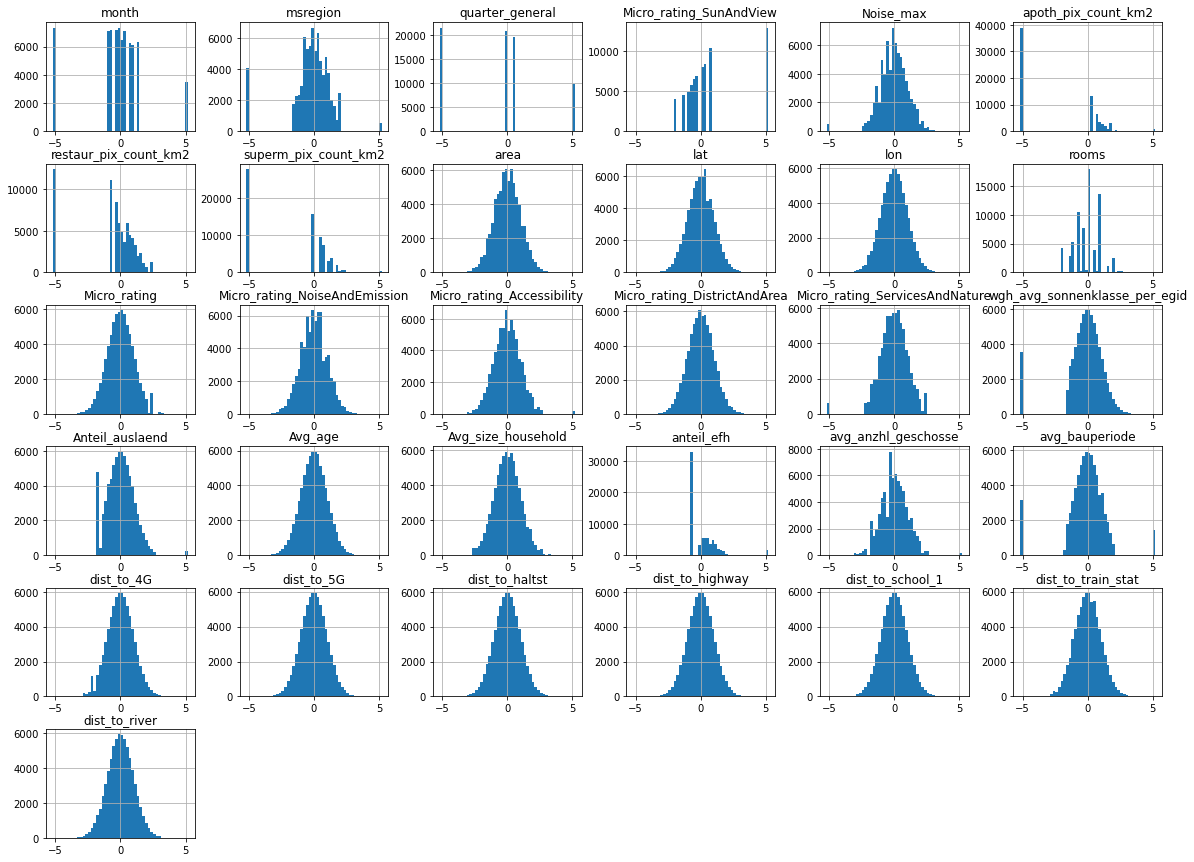

In [35]:
# after transformation
pd.DataFrame(num_data_transformed, columns=num_data_imputed.drop(['rent_full'], axis=1).columns).hist(bins=50, figsize=(20, 15))

#### Robust Scaler v.s. Quantile Transformer

- The centering and scaling statistics of the **robust scaler** are based on percentiles and are therefore not influenced by a few number of very large marginal outliers. Consequently, the resulting range of the transformed feature values is larger than for the previous scalers and, more importantly, are approximately similar: most of the transformed values lie in a [-2, 3] range. Note that the outliers themselves are still present in the transformed data. 
- **Quantile Transformer** with output_distribution parameter allows to match a Gaussian distribution. Note that this non-parametetric transformer introduces saturation artifacts for extreme values.

**Note:** Both *RobustScaler* and *QuantileTransformer* are robust to outliers in the sense that adding or removing outliers in the training set will yield approximately the same transformation on held out data. 

Here we will use *QuantileTransformer* to center and scale the numerical features.

In [36]:
# concatenate numerical and categorical features
feature_data = np.concatenate((num_data_transformed, binary_data, cat_data_encoded), axis=1)

print(num_data_transformed.shape)
print(binary_data.shape)
print(cat_data_encoded.shape)
print(feature_data.shape)

(72000, 31)
(72000, 1)
(72000, 8)
(72000, 40)


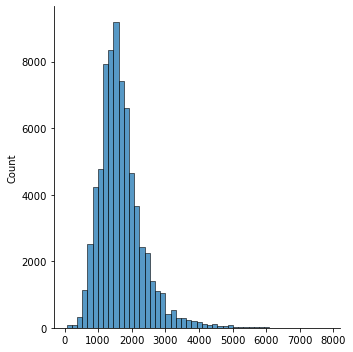

In [37]:
target_data = num_data_imputed['rent_full'].copy().values
sns.displot(target_data, bins=50)

In [38]:
# get the target column
target_data = num_data_imputed['rent_full'].copy().values

print('Feature data shape: {}'.format(feature_data.shape))
print('Target data shape: {}'.format(target_data.shape))

Feature data shape: (72000, 40)
Target data shape: (72000,)


In [39]:
# split the data into training data and validation data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(feature_data, target_data, test_size=0.2, random_state=2021)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_valid shape: {}'.format(X_valid.shape))
print('y_valid shape: {}'.format(y_valid.shape))

X_train shape: (57600, 40)
y_train shape: (57600,)
X_valid shape: (14400, 40)
y_valid shape: (14400,)


# Model Selection

**Prior Guess**

Before starting the "model selection" procedure, we did some research online and found that random forest and multi-layer perceptron performed pretty well in predict in housing price (California dataset). Here in our case, we are required to predict rents in Switzerland. Both tasks are quite similar. We will see if random forest and multi-layer perceptron would also yield the best results in our setting.

**Strategy**

This part is to select those models that perform relatively better than others. Before starting training models, we split the full training dataset into training dataset (80%) and validation dataset (20%). We will first feed the training dataset to different models with their defaulting hyperparameters and pick those models that have good performance on both training dataset and validation dataset. After this “screening” procedure, we would further look at those picked models and fine tune the hyperparameters and see if they can perform better.

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [37]:
# create three empty lists to store model names, training mse, validation mse
models = []
mse_train = []
mse_valid = []

## Linear Model

### Linear Regression

In [38]:
# linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_mse_train = mean_squared_error(y_train, lin_reg.predict(X_train))
lin_mse_valid = mean_squared_error(y_valid, lin_reg.predict(X_valid))

print('Train MSE: %.2f' % lin_mse_train)
print('Valid MSE: %.2f' % lin_mse_valid)

Train MSE: 168202.28
Valid MSE: 181917.13


In [39]:
models.append('Linear Regression')
mse_train.append(lin_mse_train)
mse_valid.append(lin_mse_valid)

### Ridge Regression

In [40]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
ridge_mse_train = mean_squared_error(y_train, ridge_reg.predict(X_train))
ridge_mse_valid = mean_squared_error(y_valid, ridge_reg.predict(X_valid))

print('Train MSE: %.2f' % ridge_mse_train)
print('Valid MSE: %.2f' % ridge_mse_valid)

Train MSE: 168202.32
Valid MSE: 181918.03


In [41]:
models.append('Rideg Regression')
mse_train.append(ridge_mse_train)
mse_valid.append(ridge_mse_valid)

### Lasso Regression

In [42]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_mse_train = mean_squared_error(y_train, lasso_reg.predict(X_train))
lasso_mse_valid = mean_squared_error(y_valid, lasso_reg.predict(X_valid))

print('Train MSE: %.2f' % lasso_mse_train)
print('Valid MSE: %.2f' % lasso_mse_valid)

Train MSE: 168434.31
Valid MSE: 182285.82


In [43]:
models.append('Lasso Regression')
mse_train.append(lasso_mse_train)
mse_valid.append(lasso_mse_valid)

### Elastic Net

In [44]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(random_state=2021)
elastic_net.fit(X_train, y_train)
elastic_mse_train =  mean_squared_error(y_train, elastic_net.predict(X_train))
elastic_mse_valid = mean_squared_error(y_valid, elastic_net.predict(X_valid))

print('Train MSE: %.2f' % elastic_mse_train)
print('Valid MSE: %.2f' % elastic_mse_valid)

Train MSE: 198448.80
Valid MSE: 214205.31


In [45]:
models.append('Elastic Net')
mse_train.append(elastic_mse_train)
mse_valid.append(elastic_mse_valid)

### Huber Regressor

In [46]:
from sklearn.linear_model import HuberRegressor

huber_reg = HuberRegressor(max_iter=200)
huber_reg.fit(X_train, y_train)
huber_mse_train = mean_squared_error(y_train, huber_reg.predict(X_train))
huber_mse_valid = mean_squared_error(y_valid, huber_reg.predict(X_valid))

print('Train MSE: %.2f' % huber_mse_train)
print('Valid MSE: %.2f' % huber_mse_valid)

Train MSE: 174066.78
Valid MSE: 189230.88


In [47]:
models.append('Huber Regressor')
mse_train.append(huber_mse_train)
mse_valid.append(huber_mse_valid)

### Bayesian Ridge Regression

In [48]:
from sklearn.linear_model import BayesianRidge

bayes_ridge = BayesianRidge()
bayes_ridge.fit(X_train, y_train)
bayes_mse_train = mean_squared_error(y_train, bayes_ridge.predict(X_train))
bayes_mse_valid = mean_squared_error(y_valid, bayes_ridge.predict(X_valid))

print('Train MSE: %.2f' % bayes_mse_train)
print('Valid MSE: %.2f' % bayes_mse_valid)

Train MSE: 168203.80
Valid MSE: 181926.53


In [49]:
models.append('Bayesian Ridge')
mse_train.append(bayes_mse_train)
mse_valid.append(bayes_mse_valid)

### Stochastic Gradient Descent Regressor

In [50]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state=2021)
sgd_reg.fit(X_train, y_train)
sgd_mse_train =  mean_squared_error(y_train, sgd_reg.predict(X_train))
sgd_mse_valid = mean_squared_error(y_valid, sgd_reg.predict(X_valid))

print('Train MSE: %.2f' % sgd_mse_train)
print('Valid MSE: %.2f' % sgd_mse_valid)

Train MSE: 169405.48
Valid MSE: 182846.49


In [51]:
models.append('SGD Regressor')
mse_train.append(sgd_mse_train)
mse_valid.append(sgd_mse_valid)

## Support Vector Machines

### Linear Support Vector Regressor

In [52]:
from sklearn.svm import LinearSVR

linear_svr = LinearSVR(random_state=2021, C=100)
linear_svr.fit(X_train, y_train)
svr_mse_train = mean_squared_error(y_train, linear_svr.predict(X_train))
svr_mse_valid = mean_squared_error(y_valid, linear_svr.predict(X_valid))

print('Train MSE: %.2f' % svr_mse_train)
print('Valid MSE: %.2f' % svr_mse_valid)

Train MSE: 176263.84
Valid MSE: 191634.69


C:\Users\89358\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [53]:
models.append('Linear SVR')
mse_train.append(svr_mse_train)
mse_valid.append(svr_mse_train)

### Support Vector Regressor

In [54]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
svr_mse_train = mean_squared_error(y_train, svr.predict(X_train))
svr_mse_valid = mean_squared_error(y_valid, svr.predict(X_valid))

print('Train MSE: %.2f' % svr_mse_train)
print('Valid MSE: %.2f' % svr_mse_valid)

Train MSE: 294246.32
Valid MSE: 317386.46


In [55]:
models.append('SVR')
mse_train.append(svr_mse_train)
mse_valid.append(svr_mse_valid)

## Decision Tree

### Decision Tree Regressor

In [56]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=2021)
tree_reg.fit(X_train, y_train)
tree_mse_train = mean_squared_error(y_train, tree_reg.predict(X_train))
tree_mse_valid = mean_squared_error(y_valid, tree_reg.predict(X_valid))

print('Train MSE: %.2f' % tree_mse_train)
print('Valid MSE: %.2f' % tree_mse_valid)

Train MSE: 270.21
Valid MSE: 194096.49


In [57]:
models.append('Decision Tree Regressor')
mse_train.append(tree_mse_train)
mse_valid.append(tree_mse_valid)

## Random Forest

### Random Forest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=2021)
forest_reg.fit(X_train, y_train)
forest_mse_train = mean_squared_error(y_train, forest_reg.predict(X_train))
forest_mse_valid = mean_squared_error(y_valid, forest_reg.predict(X_valid))

print('Train MSE: %.2f' % forest_mse_train)
print('Valid MSE: %.2f' % forest_mse_valid)

Train MSE: 13493.82
Valid MSE: 102117.26


In [59]:
models.append('Random Forest Regressor')
mse_train.append(forest_mse_train)
mse_valid.append(forest_mse_valid)

## K Nearest Neighbors

### K Neighbors Regressor

In [60]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
knr_mse_train =  mean_squared_error(y_train, knr.predict(X_train))
knr_mse_valid =  mean_squared_error(y_valid, knr.predict(X_valid))

print('Train MSE: %.2f' % knr_mse_train)
print('Valid MSE: %.2f' % knr_mse_valid)

Train MSE: 141484.26
Valid MSE: 235465.45


In [61]:
models.append('K Neighbors Regressor')
mse_train.append(knr_mse_train)
mse_valid.append(knr_mse_valid)

## Neural Network

### Multi-Layer Perceptron

In [62]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()
mlp.fit(X_train, y_train)
mlp_mse_train = mean_squared_error(y_train, mlp.predict(X_train))
mlp_mse_valid = mean_squared_error(y_valid, mlp.predict(X_valid))

print('Train MSE: %.2f' % mlp_mse_train)
print('Valid MSE: %.2f' % mlp_mse_valid)

Train MSE: 119138.01
Valid MSE: 135483.59


C:\Users\89358\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [63]:
models.append('MLP Regressor')
mse_train.append(mlp_mse_train)
mse_valid.append(mlp_mse_valid)

In [64]:
train_valid_table = pd.DataFrame([mse_train, mse_valid], columns=models, index=['MSE Train', 'MSE Test'])
train_valid_table.round(2)

,Linear Regression,Rideg Regression,Lasso Regression,Elastic Net,Huber Regressor,Bayesian Ridge,SGD Regressor,Linear SVR,SVR,Decision Tree Regressor,Random Forest Regressor,K Neighbors Regressor,MLP Regressor
MSE Train,168202.28,168202.32,168434.31,198448.80,174066.78,168203.80,169405.48,176263.84,294246.32,270.21,13493.82,141484.26,119138.01
MSE Test,181917.13,181918.03,182285.82,214205.31,189230.88,181926.53,182846.49,176263.84,317386.46,194096.49,102117.26,235465.45,135483.59


As expected, random forest regressor and multi-layer perceptron outperformed other models on both training data and validation data. 

# Model Evaluation

## Hyperparameter Tuning

In this part, we further looked at random forest and multi-layer perceptron. Our strategy is to first make models overfitting and then solve the overfitting with fine-tuning methods since overfitting is easier to solve than underfitting. Overfitting can be easily detected by simply looking at the MSEs on training and vlidation dataset. If a model yields a lower MSE on training dataset but a higher MSE on validation dataset, then it is more likely to overfit the dataset. Scikit-learn library provides two approaches for optimal hyperparameter search - *GridSearch* and *RandomizedSearch*. *GridSearch* is an exhaustive search for optimal hyperparameters, which is inefficient and computationally expensive. *RandomizedSearch* is a random  search for optimal hyperparameters, which yields a less accurate combination. Since there are a lot of empirically-derived rules of thumb on hyperparameter tuning, we decided to search for optimal hyperparameters manually and then use 5-fold cross validation on the full training dataset for evaluation.

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### Random Forest

The random forest regressor with defaulting settings overfits the data since MSE is much smaller on training data than is on validation data. 

We would mainly focus on the following hyperparameters:

- **n_estimators:** In general the more trees the less likely the algorithm is to overfit. The lower this number, the closer the model is to a decision tree, with a restricted feature set. I will increase this hyperparameters to improve generalization.

- **max_features:** This determines how many features each tree is randomly assigned. The smaller, the less likely to overfit, but if this hyperparamter is too small, it will start to introduce under fitting. A rule of thumb is to try 30-50% of the number of features.

- **max_depth:** This hyperparameter will reduce the complexity of the learned models, lowering over fitting risk. I will start with small, and increasing until you I get the desirable result.

- **min_samples_leaf:** I will try setting this to values greater than one. This has a similar effect to the max_depth hyperparameter, it means the branch will stop splitting once the leaves have that number of samples each.

My strategy is to change one hyperparameter at a time and evaluate the result since sklearn gridsearch algorithm is too slow.

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# I tried different combinations and it turned out this one works pretty well
forest_reg = RandomForestRegressor(n_estimators=300, 
                                   max_features=30, 
                                   max_depth=12, 
                                   min_samples_leaf=5, 
                                   random_state=2021)
forest_reg.fit(X_train, y_train)
forest_mse_train = mean_squared_error(y_train, forest_reg.predict(X_train))
forest_mse_valid = mean_squared_error(y_valid, forest_reg.predict(X_valid))

print('Train MSE: %.2f' % forest_mse_train)
print('Valid MSE: %.2f' % forest_mse_valid)

Train MSE: 71371.80
Valid MSE: 110048.75


In [41]:
# 5-fold cross validation
forest_reg_scores = cross_val_score(forest_reg, feature_data, target_data, 
                                     scoring='neg_mean_squared_error', cv=5)
forest_reg_mse_scores = - forest_reg_scores
print('%.2f mse with a standard deviation of %.2f' % 
      (forest_reg_mse_scores.mean(), forest_reg_mse_scores.std()))

104553.97 mse with a standard deviation of 1701.27


### Multi-Layer Perceptron

Multi-layer perceptron consists of three types of layers—the input layer, output layer and hidden layer, which is the true computational engine of the MLP. It is important to configure the number of neurons in hidden layers. The past common practice is to form a pyramid (the numberof neurons per hidden layer is decreasing from top layer to bottom layer). The new trend is to use the same number of neurons in all hidden layers.
We tried both and it turned out the structure from the new trend works better in our setting. We used the trial and error approach to pin down the optimal combination of hyperparameters. We eventually chose three hidden layers with 60 neurons in each layer.

In [42]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

mlp = MLPRegressor(hidden_layer_sizes=(60, 60, 60), 
                   batch_size=200, 
                   random_state=2021, 
                   max_iter=500, 
                   early_stopping=True)
mlp.fit(X_train, y_train)
mlp_mse_train = mean_squared_error(y_train, mlp.predict(X_train))
mlp_mse_valid = mean_squared_error(y_valid, mlp.predict(X_valid))

print('Train MSE: %.2f' % mlp_mse_train)
print('Valid MSE: %.2f' % mlp_mse_valid)

Train MSE: 95711.40
Valid MSE: 116411.87


In [43]:
# 5-fold cross validation
mlp_scores = cross_val_score(mlp, feature_data, target_data, 
                                scoring='neg_mean_squared_error', cv=5)
mlp_mse_scores = - mlp_scores
print('%.2f mse with a standard deviation of %.2f' % 
      (mlp_mse_scores.mean(), mlp_mse_scores.std()))

111073.55 mse with a standard deviation of 3771.04


# Model Prediction

## Testing Data Preprocessing

In [44]:
# read test data
X_test_raw_data = pd.read_csv('X_test.csv')
y_test_raw_data = pd.read_csv('Y_test_example.csv')

# make copies
X_test_data = X_test_raw_data.copy()
y_test_data = y_test_raw_data.copy()

print('X test data shape: {}'.format(X_test_data.shape))
print('y test data shape: {}'.format(y_test_data.shape))

X test data shape: (18001, 82)
y test data shape: (18001, 2)


In [45]:
# merge features and target by id
test_data = pd.merge(X_test_data, y_test_data, on='id')

print('Test data shape: {}'.format(test_data.shape))

Test data shape: (18001, 83)


In [46]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18001 entries, 0 to 18000
Data columns (total 83 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18001 non-null  int64  
 1   GDENAMK                         18001 non-null  object 
 2   GDENR                           18001 non-null  int64  
 3   KTKZ                            18001 non-null  object 
 4   address                         18001 non-null  object 
 5   area                            14396 non-null  float64
 6   balcony                         8698 non-null   float64
 7   basement                        269 non-null    float64
 8   bath                            112 non-null    float64
 9   cabletv                         6206 non-null   float64
 10  cheminee                        818 non-null    float64
 11  date                            18001 non-null  object 
 12  descr                           

In [47]:
# get target column
y_test = test_data['rent_full'].copy().values
y_test.shape

(18001,)

In [48]:
# concatenate the training data and test data
full_feature_data = pd.concat([train_data.drop('rent_full', axis=1), test_data.drop('rent_full', axis=1)], axis=0)
full_feature_data.shape

(90001, 82)

We combined training data (without target) and testing data together in order to better impute missing values on the testing dataset. The imputation procedure and scaling procedure are the same as the training data preparation part.

In [49]:
# get numerical data
full_numeric_data = full_feature_data[numeric_data.drop(['rent_full'], axis=1).columns.values]

# get categorical data
full_categoric_data = full_feature_data[categoric_data.columns.values]

print('Full numerical data shape: {}'.format(full_numeric_data.shape))
print('Full categorical data shape: {}'.format(full_categoric_data.shape))

Full numerical data shape: (90001, 32)
Full categorical data shape: (90001, 1)


In [50]:
full_numeric_data.isnull().mean()

month                             0.000000
msregion                          0.000000
newly_built                       0.000000
quarter_general                   0.000000
Micro_rating_SunAndView           0.000000
Noise_max                         0.000000
apoth_pix_count_km2               0.000000
restaur_pix_count_km2             0.000000
superm_pix_count_km2              0.000000
area                              0.198198
lat                               0.000000
lon                               0.000000
rooms                             0.025600
Micro_rating                      0.000000
Micro_rating_NoiseAndEmission     0.000000
Micro_rating_Accessibility        0.000000
Micro_rating_DistrictAndArea      0.000000
Micro_rating_ServicesAndNature    0.000000
wgh_avg_sonnenklasse_per_egid     0.000233
Anteil_auslaend                   0.029555
Avg_age                           0.029555
Avg_size_household                0.030711
anteil_efh                        0.021589
avg_anzhl_g

In [51]:
# one hot encode the categorical features
encoder = OneHotEncoder()
full_cat_data_encoded = encoder.fit_transform(full_categoric_data.to_numpy().reshape(-1, 1))
full_cat_data_encoded = full_cat_data_encoded.toarray()
full_cat_data_encoded.shape

(90001, 8)

In [52]:
# using regularized linear regression to predict the numerical missing values
# using the whole data including both training and testing data as predictors in preidcting the missing values

imputer = IterativeImputer(random_state=2021, estimator=BayesianRidge())
full_num_data_imputed = imputer.fit_transform(np.column_stack((full_numeric_data, full_cat_data_encoded)))
# convert it into a dataframe
full_num_data_imputed = pd.DataFrame(full_num_data_imputed[:,:full_numeric_data.shape[1]], columns=full_numeric_data.columns)

In [53]:
full_num_data_imputed.shape

(90001, 32)

In [54]:
full_num_data_imputed.describe()

,month,msregion,newly_built,quarter_general,Micro_rating_SunAndView,Noise_max,apoth_pix_count_km2,restaur_pix_count_km2,superm_pix_count_km2,area,...,anteil_efh,avg_anzhl_geschosse,avg_bauperiode,dist_to_4G,dist_to_5G,dist_to_haltst,dist_to_highway,dist_to_school_1,dist_to_train_stat,dist_to_river
count,90001.000000,90001.000000,90001.000000,90001.000000,90001.00000,90001.000000,90001.000000,90001.000000,90001.000000,90001.000000,...,90001.000000,90001.000000,90001.000000,90001.000000,90001.000000,90001.000000,90001.000000,90001.000000,90001.000000,90001.000000
mean,5.612971,48.762358,0.056955,2.242575,6.50615,40.889857,1.486017,11.662382,1.720281,81.780819,...,0.230249,3.901068,1953.188259,342.134711,7626.210662,167.980417,2925.495068,398.040406,1058.530378,822.327645
std,3.039484,33.384566,0.231758,1.028592,2.80552,9.155206,2.698038,22.540904,2.223004,33.245311,...,0.287393,1.685395,29.466935,378.312335,12353.522972,174.362426,3234.839528,353.872566,1162.990500,966.055558
min,1.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,...,-0.057007,0.406849,1900.000000,0.000000,2.236068,2.828427,11.401754,1.414214,3.162278,0.041264
25%,3.000000,13.000000,0.000000,1.000000,4.00000,35.000000,0.000000,1.000000,0.000000,60.000000,...,0.000000,2.750000,1931.125000,111.139552,1322.996977,79.429214,1146.034903,205.912603,374.488985,222.197437
50%,5.000000,48.000000,0.000000,2.000000,7.00000,40.000000,0.000000,3.000000,1.000000,80.000000,...,0.100000,3.500000,1954.142857,225.390772,3518.907359,131.183078,1985.140045,329.611893,683.768967,513.541911
75%,8.000000,78.000000,0.000000,3.000000,9.00000,47.000000,2.000000,9.000000,3.000000,100.000000,...,0.400000,4.666667,1975.000000,429.196925,9018.114770,203.823453,3411.335369,476.942344,1244.943774,1065.067772
max,11.000000,106.000000,1.000000,4.000000,10.00000,72.000000,15.000000,136.000000,12.000000,945.000000,...,1.000000,16.000000,2014.000000,4475.791103,88563.904680,5927.634014,41454.525950,9375.898144,23787.109950,8233.113960


In [55]:
print(test_data.shape[0])

18001


In [56]:
# detach testing numerical data from full testing numerical data
test_num_data = full_num_data_imputed.iloc[-test_data.shape[0]:]

# detach testing categorical data from full testing categorical data
test_cat_data_encoded = full_cat_data_encoded[-test_data.shape[0]:]

print(test_num_data.shape)
print(test_cat_data_encoded.shape)

(18001, 32)
(18001, 8)


array([[<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'msregion'}>,
        <AxesSubplot:title={'center':'newly_built'}>,
        <AxesSubplot:title={'center':'quarter_general'}>,
        <AxesSubplot:title={'center':'Micro_rating_SunAndView'}>,
        <AxesSubplot:title={'center':'Noise_max'}>],
       [<AxesSubplot:title={'center':'apoth_pix_count_km2'}>,
        <AxesSubplot:title={'center':'restaur_pix_count_km2'}>,
        <AxesSubplot:title={'center':'superm_pix_count_km2'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lon'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'Micro_rating'}>,
        <AxesSubplot:title={'center':'Micro_rating_NoiseAndEmission'}>,
        <AxesSubplot:title={'center':'Micro_rating_Accessibility'}>,
        <AxesSubplot:title={'center':'Micro_rating_DistrictAndArea'}>,
        <AxesSubplot:title

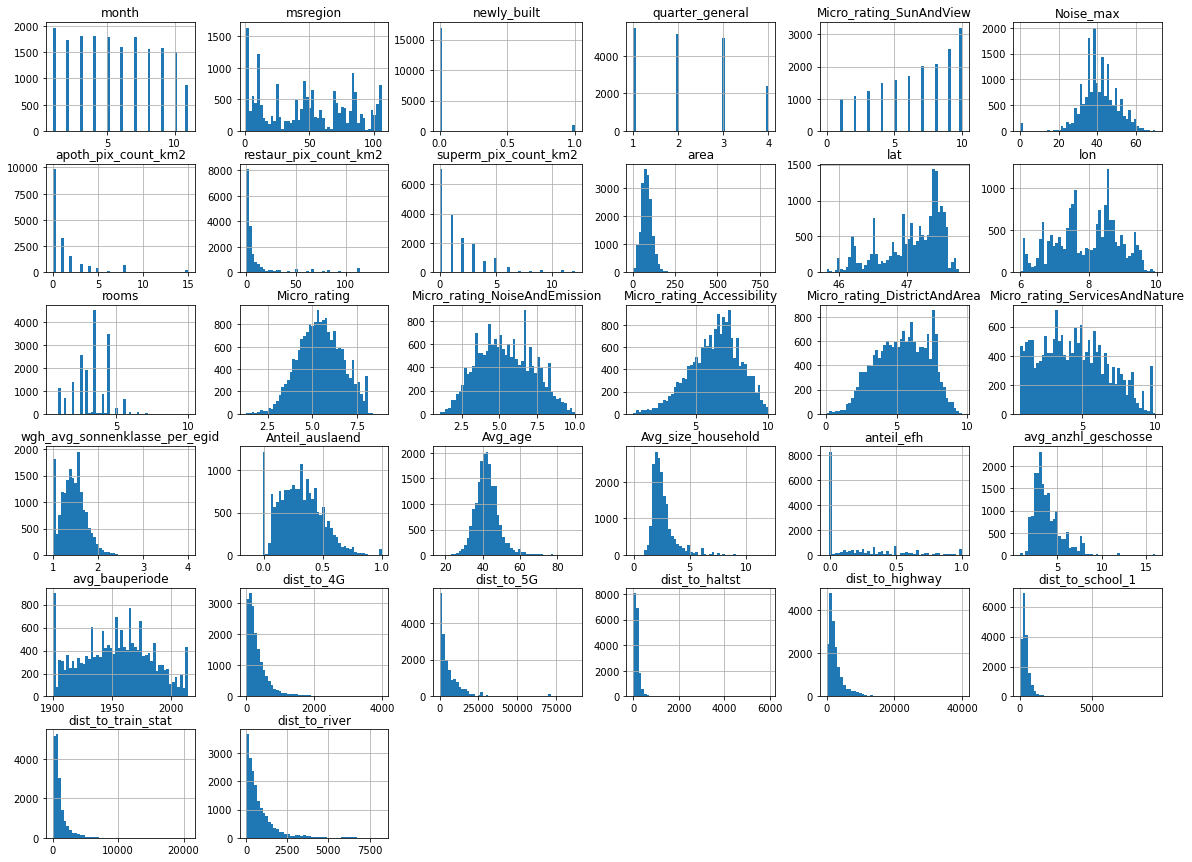

In [57]:
test_num_data.hist(bins=50, figsize=(20, 15))

In [58]:
# get binary variable
test_bin_data = test_num_data[['newly_built']]

# remove binary variable from data transformation
test_num_data = test_num_data.drop(['newly_built'], axis=1)

In [59]:
print(test_bin_data.shape)
print(test_num_data.shape)

(18001, 1)
(18001, 31)


In [60]:
# quantile transformation
transformer = QuantileTransformer(output_distribution='normal')
test_num_data_transformed = transformer.fit_transform(test_num_data)

array([[<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'msregion'}>,
        <AxesSubplot:title={'center':'quarter_general'}>,
        <AxesSubplot:title={'center':'Micro_rating_SunAndView'}>,
        <AxesSubplot:title={'center':'Noise_max'}>,
        <AxesSubplot:title={'center':'apoth_pix_count_km2'}>],
       [<AxesSubplot:title={'center':'restaur_pix_count_km2'}>,
        <AxesSubplot:title={'center':'superm_pix_count_km2'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lon'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'Micro_rating'}>,
        <AxesSubplot:title={'center':'Micro_rating_NoiseAndEmission'}>,
        <AxesSubplot:title={'center':'Micro_rating_Accessibility'}>,
        <AxesSubplot:title={'center':'Micro_rating_DistrictAndArea'}>,
        <AxesSubplot:title={'center':'Micro_rating_ServicesAndNature'}>,
       

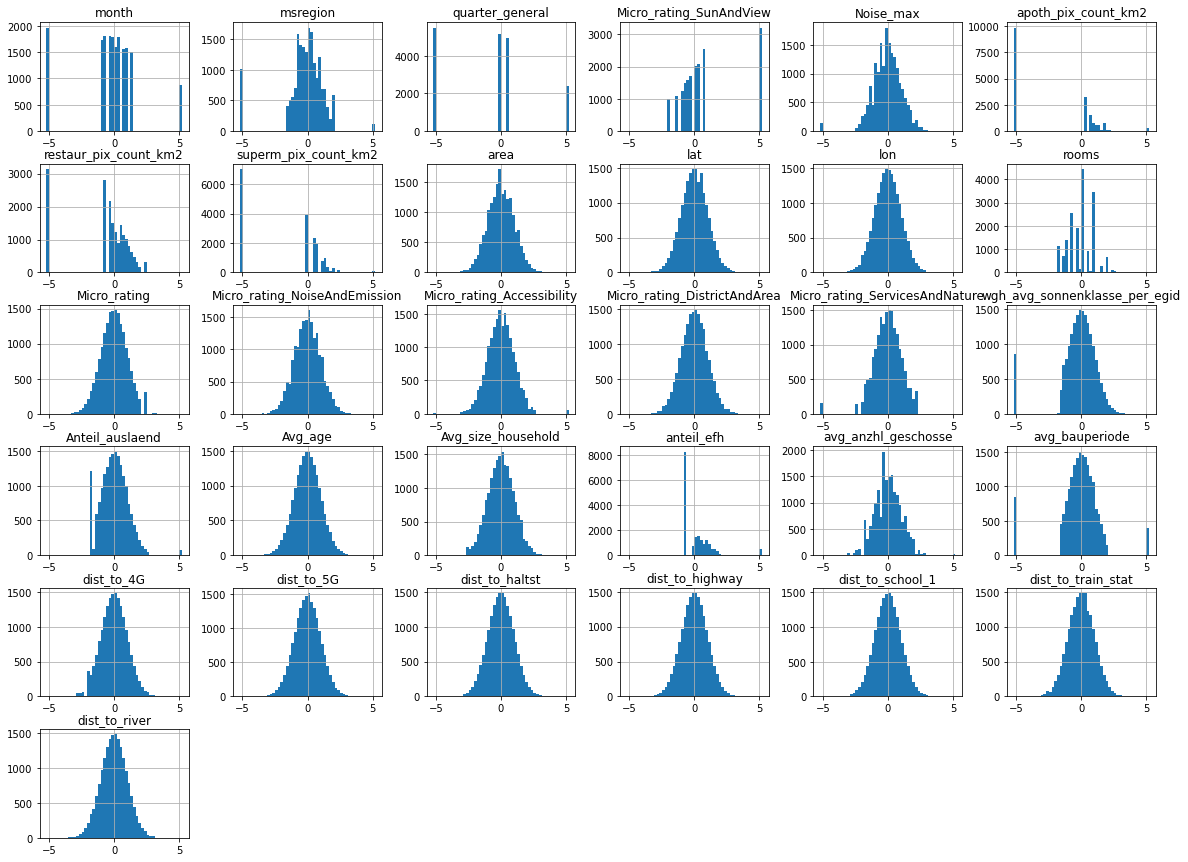

In [61]:
pd.DataFrame(test_num_data_transformed, columns=test_num_data.columns).hist(bins=50, figsize=(20, 15))

In [62]:
print(test_num_data_transformed.shape)
print(test_bin_data.shape)
print(test_cat_data_encoded.shape)

(18001, 31)
(18001, 1)
(18001, 8)


In [63]:
# concatenate testing numerical data and categorical data
X_test = np.concatenate((test_num_data_transformed, test_bin_data, test_cat_data_encoded), axis=1)

# get target column
y_test = test_data['rent_full'].copy().values

print(X_test.shape)
print(y_test.shape)

(18001, 40)
(18001,)


## Random Forest Prediction

In [64]:
forest_pred = forest_reg.predict(X_test)
forest_output = pd.DataFrame(data={'id':X_test_data['id'], 'rent_full':forest_pred})
forest_output.head()

,id,rent_full
0,1,1748.792792
1,2,4610.840752
2,3,1415.577695
3,4,2155.063186
4,5,2734.975522


In [65]:
forest_output.to_csv('Y_test_forest.csv', index=None)

## Multi-Layer Perceptron Prediction

In [66]:
mlp_pred = mlp.predict(X_test)
mlp_output = pd.DataFrame(data={'id':X_test_data['id'], 'rent_full':mlp_pred})
mlp_output.head()

,id,rent_full
0,1,1659.719452
1,2,3974.361495
2,3,1435.082208
3,4,2097.999429
4,5,2803.664548


In [67]:
mlp_output.to_csv('Y_test_mlp.csv', index=None)